<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>February 20, 2018: collecting from dedicated nbs
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions: <i>Jordan normal forms</i>.
</div>

In [6]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, t

init_printing()

In [7]:
%run ../../src/matrix_functions.py

In [41]:
v = IndexedBase('v')

---

# Fibonacci generation matrix

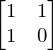

In [3]:
F = Matrix([
        [1, 1],
        [1, 0],
    ])
F

In [12]:
m=2
data, eigenvals, multiplicities = eigendata = eigen_data(F)
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
cmatrices = component_matrices(F, Phi_polynomials)
M_space_ctor = M_space(cmatrices)
v_vector = Matrix(m, 1, lambda i, _: v[i])
M_space_v = M_space_ctor(v_vector)

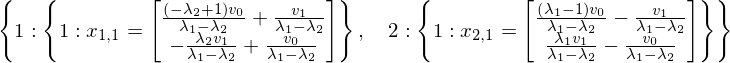

In [13]:
M_space_v

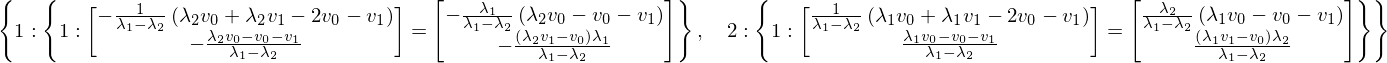

In [15]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(F, M_space_v,post=lambda i: i.radsimp().factor())
eqs

In [16]:
miniblocks = Jordan_blocks(eigendata)
X, J = Jordan_normalform(eigendata, matrices=(F, M_space_v, miniblocks))

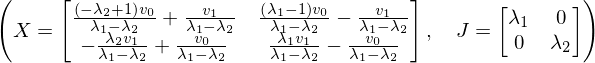

In [17]:
X, J

In [33]:
# FX=XJ
assert ((F*X.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X.rhs*J.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

# $\mathcal{P}$

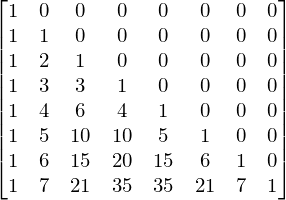

In [35]:
m = 8
P = Matrix(m,m,binomial)
P

In [39]:
data, eigenvals, multiplicities = eigendata = eigen_data(P)
Phi_poly = Phi_poly_ctor(deg=m-1)
#Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials = component_polynomials_riordan(m)
cmatrices = component_matrices(P, Phi_polynomials)

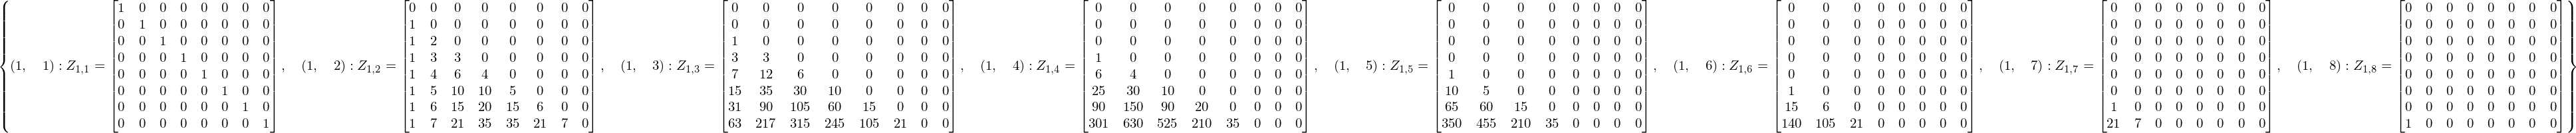

In [40]:
cmatrices

In [42]:
v_vector = Matrix(m, 1, lambda i, _: v[i])
M_space_ctor = M_space(cmatrices)
M_space_v = M_space_ctor(v_vector)

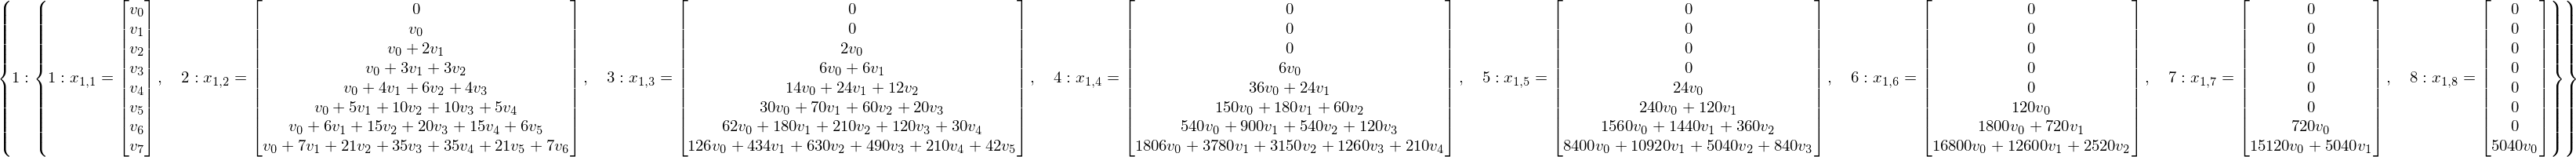

In [43]:
M_space_v

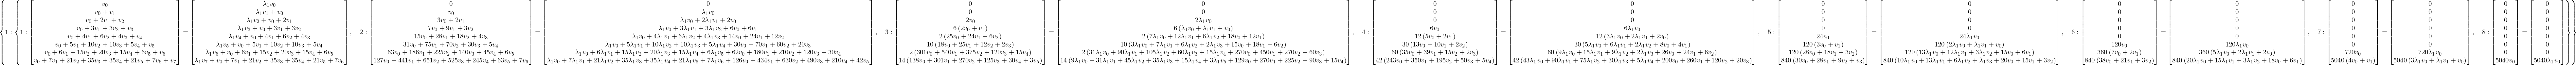

In [44]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(P, M_space_v,post=lambda i: i.radsimp().factor())
eqs

In [49]:
miniblocks = Jordan_blocks(eigendata)
X_P, J_P = Jordan_normalform(eigendata, matrices=(P, M_space_v, miniblocks))

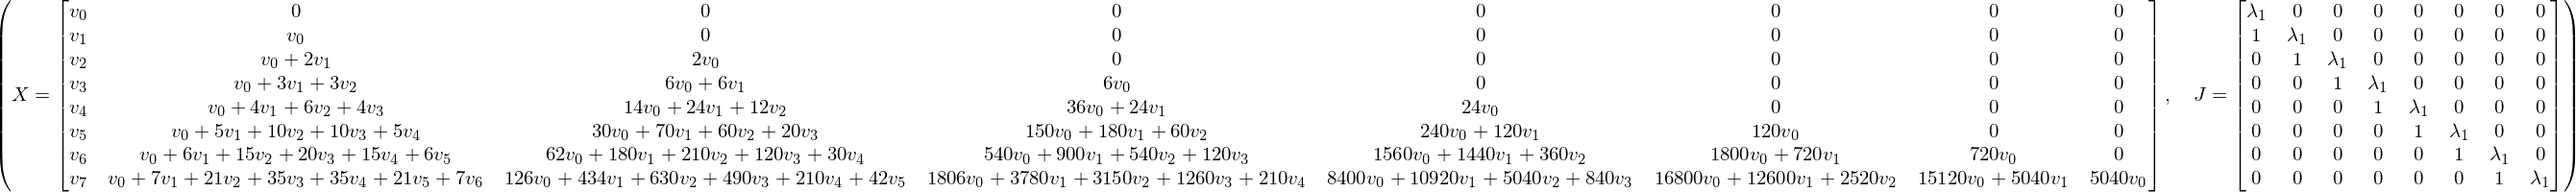

In [50]:
X_P, J_P

In [51]:
# FX=XJ
assert ((P*X_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X_P.rhs*J_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

# $\mathcal{C}$

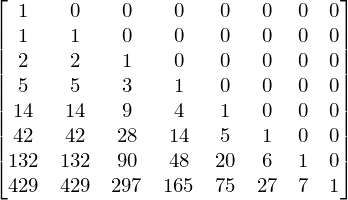

In [56]:
m = 8
A = Eq(Function('A')(t), 1/(1-t))
C = Matrix(m, m, riordan_matrix_by_AZ_sequences(m, (A, A)))
C

In [59]:
data, eigenvals, multiplicities = eigendata = eigen_data(C)
Phi_poly = Phi_poly_ctor(deg=m-1)
#Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials = component_polynomials_riordan(m)
cmatrices = component_matrices(C, Phi_polynomials)

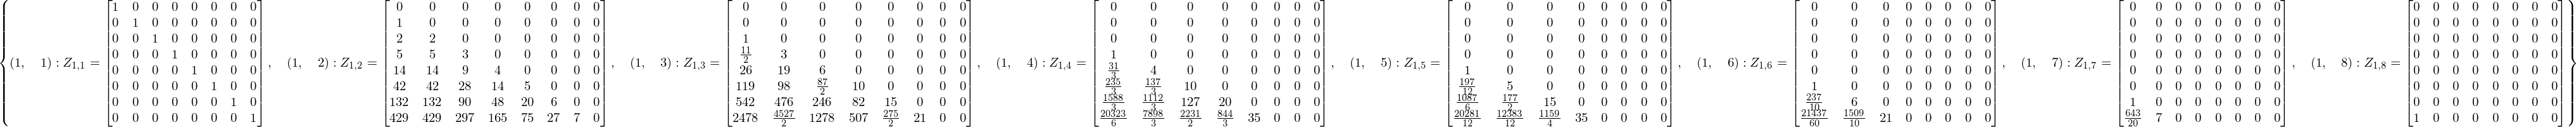

In [60]:
cmatrices

In [61]:
v_vector = Matrix(m, 1, lambda i, _: v[i])
M_space_ctor = M_space(cmatrices)
M_space_v = M_space_ctor(v_vector)

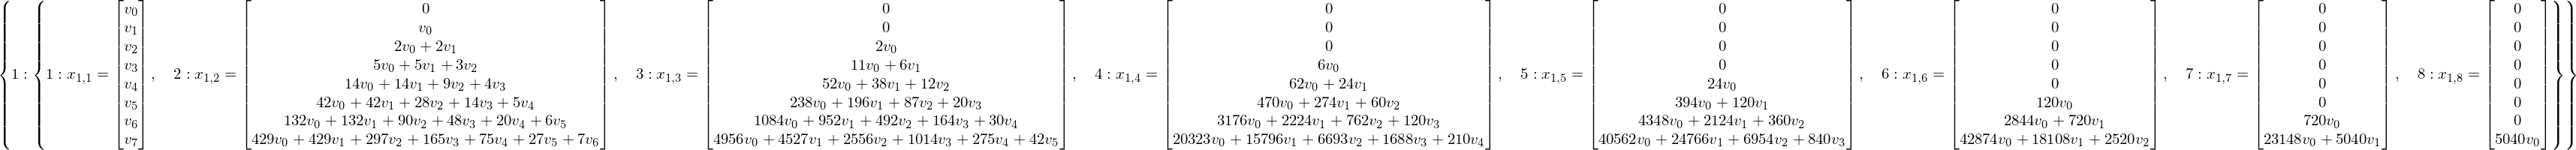

In [62]:
M_space_v

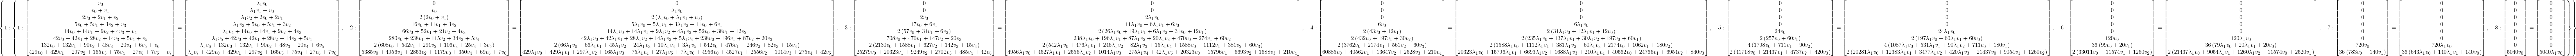

In [63]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(C, M_space_v,post=lambda i: i.radsimp().factor())
eqs

In [64]:
miniblocks = Jordan_blocks(eigendata)
X_C, J_C = Jordan_normalform(eigendata, matrices=(C, M_space_v, miniblocks))

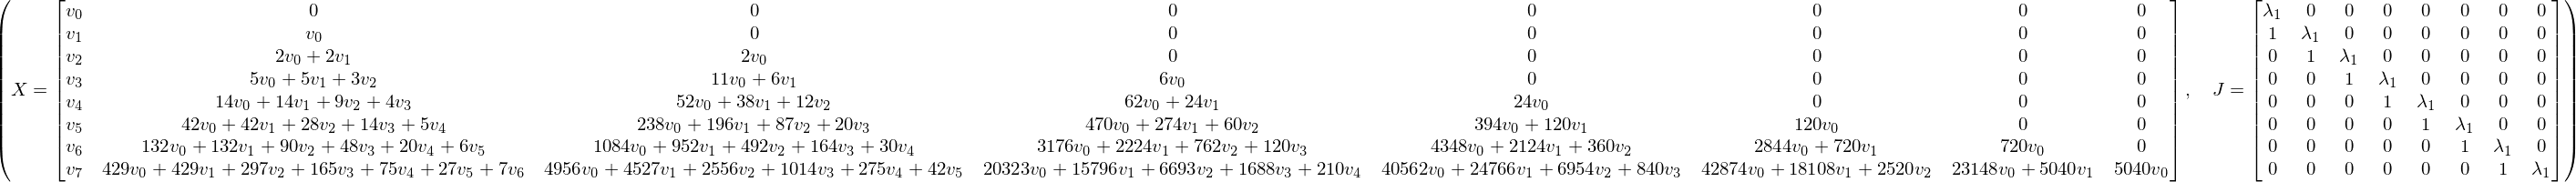

In [65]:
X_C, J_C

In [67]:
# FX=XJ
assert ((C*X_C.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X_C.rhs*J_C.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

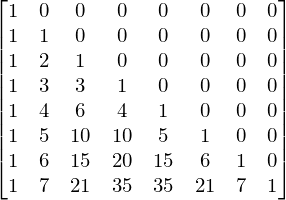

In [71]:
(X_P.rhs*X_C.rhs**(-1)*C*X_C.rhs*X_P.rhs**(-1)).applyfunc(simplify)

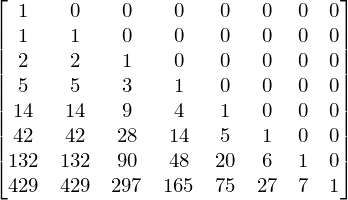

In [72]:
(X_C.rhs*X_P.rhs**(-1)*P*X_P.rhs*X_C.rhs**(-1)).applyfunc(simplify)

In [77]:
X_CP = (X_C.rhs*X_P.rhs**(-1)).applyfunc(simplify)

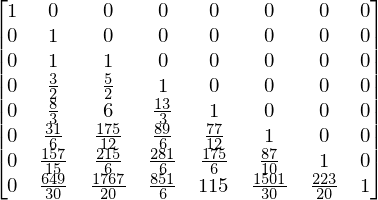

In [80]:
L = Lambda(v_vector, X_CP)
X_CP_v = L(*([1]+[0]*(m-1)))
X_CP_v

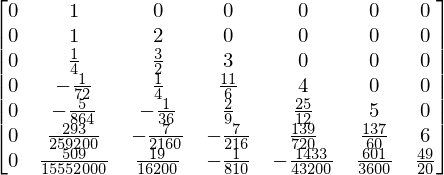

In [81]:
production_matrix(X_CP_v, exp=True)

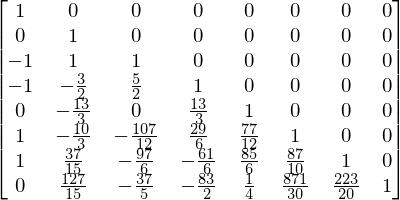

In [84]:
L = Lambda(v_vector, X_CP)
X_CP_v = L(*([1]*m))
X_CP_v

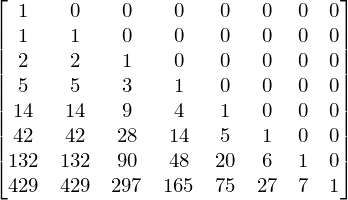

In [86]:
X_CP_v * P * X_CP_v**(-1)

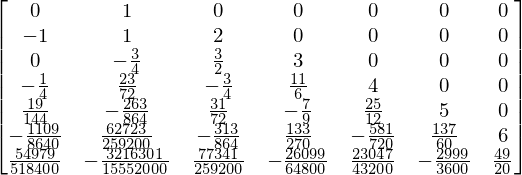

In [85]:
production_matrix(X_CP_v, exp=True)

In [83]:
is_exponential_RA(X_CP_v, show_witness=True)

(False,
 {0: [1, 3/2, 11/6, 25/12, 137/60, 49/20],
  1: [1/4, 1/4, 2/9, 139/720, 601/3600],
  2: [-1/72, -1/36, -7/216, -1433/43200],
  3: [-5/864, -7/2160, -1/810],
  4: [293/259200, 19/16200]},
 {0: [], 1: [], 2: [], 3: [], 4: {k[4]: -11/259200}})

In [ ]:
((X_P.rhs*X_C.rhs**(-1))**(-1)).applyfunc(simplify)

In [ ]:
((X_C.rhs*X_P.rhs**(-1))**(-1)).applyfunc(simplify)